this is gdp_hh_income_ratio 0.5693163233856856
this is gdp_hh_income_ratio 0.48269875350146507
this is gdp_hh_income_ratio 0.6273531062763664
this is gdp_hh_income_ratio 0.5572840649670346
this is gdp_hh_income_ratio 0.5733482941091586
this is gdp_hh_income_ratio 0.5640018095554232
this is gdp_hh_income_ratio 0.45816783180970766
this is gdp_hh_income_ratio 0.6223441549024596
this is gdp_hh_income_ratio 0.5344995185914587
this is gdp_hh_income_ratio 0.5405009462330189
this is gdp_hh_income_ratio 0.6150239555049684
this is gdp_hh_income_ratio 0.5975202303393177
this is gdp_hh_income_ratio 0.5303030631874837
this is gdp_hh_income_ratio 0.44773326498084065
this is gdp_hh_income_ratio 0.4721137038558832
this is gdp_hh_income_ratio 0.5135348612796126
this is gdp_hh_income_ratio 0.5610056969785944
this is gdp_hh_income_ratio 0.5121129912675326
this is gdp_hh_income_ratio 0.5552264775358462
this is gdp_hh_income_ratio 0.4182670924250829
this is gdp_hh_income_ratio 0.4927219069849008
this is gd

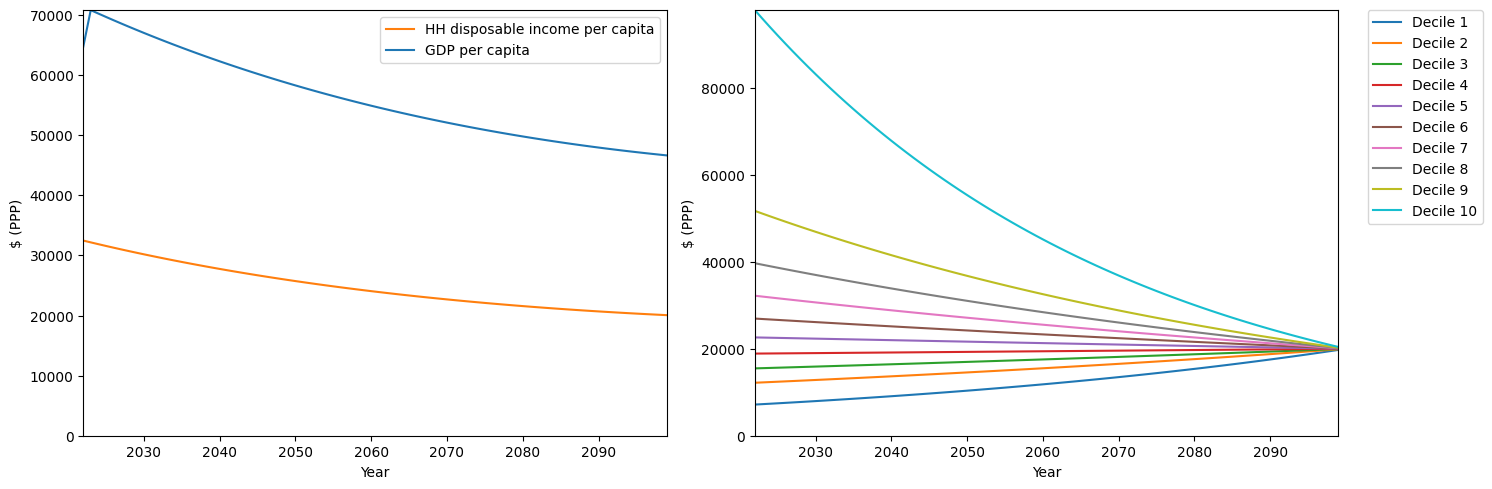

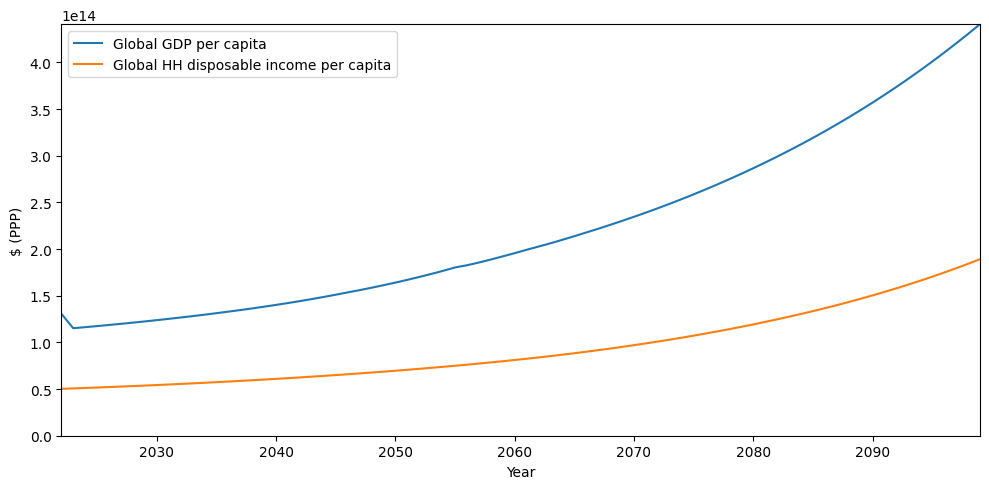

In [3]:
from scenario_class import Scenario
from plots_class import Plots

scenario_params = {"end_year": 2100,
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon budget": 500 # in terms of GtCO2 that is gigatons of CO2                 
            }

scenario_1 = Scenario(scenario_params)
scenario_1.compute_country_scenario_params()
scenario_1.run()

plotting_1 = Plots(scenario_1)
plotting_1.plot_specific_country_econ(country="United States")

plotting_1.plot_global_economy()